In [1]:
# Install (pip install pycddlib )
#pip install pycddlib

In [31]:
import cdd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import itertools

# 2D

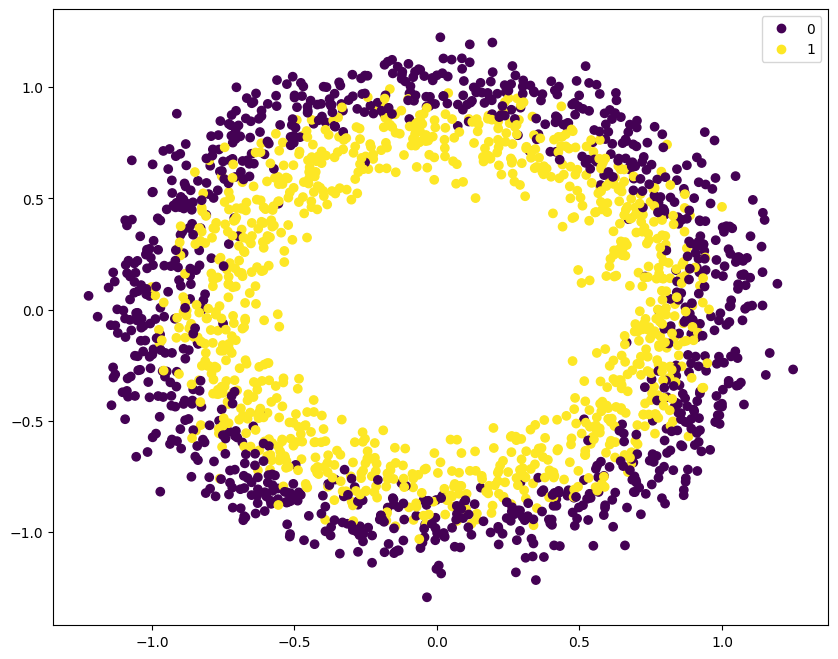

In [33]:
random_state = 0

x, y = make_circles(n_samples=2000, noise=0.1, random_state=random_state)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=random_state)

plt.figure(figsize=(10,8))
scatter = plt.scatter(x[:, 0], x[:, 1], c=y)
plt.legend(*scatter.legend_elements(), loc="upper right")
plt.show()

In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=[4] * 1, max_iter=2000, early_stopping=True, 
                    n_iter_no_change=100, validation_fraction=0.2,
                    solver='adam', activation="relu", random_state=random_state, 
                    learning_rate_init=0.001)
mlp.fit(train_x, train_y)

MLPClassifier(early_stopping=True, hidden_layer_sizes=[4], max_iter=2000,
              n_iter_no_change=100, random_state=0, validation_fraction=0.2)

# 3D

In [36]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pandas as pd

# Loading the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Normalizing the data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Creating a DataFrame
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['species'] = Y

# Creating an interactive version of the plot using Plotly
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='species')
fig.show()

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Loading the Iris dataset
iris = load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

# Normalizing the data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Creating a Multi-layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)

# Training the MLP classifier
clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Showing the classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/anupamchaudhauri/Library/Caches/pypoetry/virtualenvs/tree-diff-vPVmu6Ox-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [39]:
clf.coefs_

[array([[ 0.45799416,  0.60666886, -0.3837783 ,  0.20343058],
        [-1.40892887, -0.29871337,  0.15346897, -0.46660415],
        [ 0.85541443,  0.1695168 , -1.81304229,  2.11935373]]),
 array([[-1.15158292,  0.77567292,  0.01904687],
        [-0.54227863,  0.01965567, -0.49861632],
        [ 0.83888307, -1.44124621, -1.27713659],
        [-0.45331296, -1.96662119,  1.21208481]])]

In [40]:
clf.intercepts_

[array([ 1.56682064, -0.75000781,  0.12972501, -0.19187742]),
 array([ 0.09619564, -0.22260902, -0.41782931])]

In [47]:
def get_coefs_and_intercepts(eg="3D"):
    if eg == "aletheia":
        #Aletheia weights
        coefs = [np.array([[ 1.26330575,  0.81106997,  2.28835997,  0.66100558],
                [ 0.37596265,  0.36973942, -0.85882211,  2.02183899]]),
         np.array([[ 0.87355974],
                [ 1.89058246],
                [-1.89513973],
                [-2.56049663]])]
        intercepts = [np.array([ 1.47921924,  0.93827836, -0.02134388, -0.4247285 ]),
         np.array([-0.66509044])]
    elif eg == "2D":
        # 2D weights (concentric circles)
        coefs = mlp.coefs_
        intercepts = mlp.intercepts_
    elif eg == "3D":
        # 3D weights
        coefs = clf.coefs_
        intercepts = clf.intercepts_
    else:
        raise Exception()
    
    return coefs, intercepts

coefs, intercepts = get_coefs_and_intercepts("3D")

In [48]:
coefs, intercepts

([array([[ 0.45799416,  0.60666886, -0.3837783 ,  0.20343058],
         [-1.40892887, -0.29871337,  0.15346897, -0.46660415],
         [ 0.85541443,  0.1695168 , -1.81304229,  2.11935373]]),
  array([[-1.15158292,  0.77567292,  0.01904687],
         [-0.54227863,  0.01965567, -0.49861632],
         [ 0.83888307, -1.44124621, -1.27713659],
         [-0.45331296, -1.96662119,  1.21208481]])],
 [array([ 1.56682064, -0.75000781,  0.12972501, -0.19187742]),
  array([ 0.09619564, -0.22260902, -0.41782931])])

In [49]:
def vector_mask_to_matrix(v):
    return np.eye(v.shape[0]) * v

In [50]:
def find_activation_region_layer_l(coefs, intercepts, pattern_l, pattern_previous,
                                   A_previous, B_previous, layer,
                                   constraints_A, constraints_B):
    # pattern is a column vector, 1 => active, 0 => inactive
    # convert to                  1 => active, -1 => inactive (to make it easier to flip equations)
    inequality_dir = pattern_l * 2 - 1 # 1 -> 1, 0 -> -1
    print("inequality_dir", inequality_dir)
    
    #constraints_A, constraints_b = get_constraints_layer1(pattern_layer1, coefs, intercepts)
    
    W_l = coefs[layer].transpose()
    
    # Convert pattern previous to matrix
    pattern_previous_matrix = vector_mask_to_matrix(pattern_previous)
    
    A_l = (W_l @ pattern_previous_matrix @ A_previous) * inequality_dir
    
    # need to negate A_l as solves -Ax + b > 0
    A = np.vstack((-A_l, constraints_A))
    
    b_l = intercepts[layer][:,np.newaxis]
    B_l = (W_l @ pattern_previous_matrix @ B_previous + b_l) * inequality_dir

    b = np.vstack((B_l, constraints_B))
    
    #import pdb; pdb.set_trace()
    
    # compute H = [b - A] to represent system of inequalities,
    # and use pycddlib to solve and find verticies of resultant polytope that satisfies inequalities
        
    H = np.hstack((b,-A))
    

    mat1 = cdd.Matrix(H, number_type = 'float')
    mat1.rep_type = cdd.RepType.INEQUALITY
    poly1 = cdd.Polyhedron(mat1)
    print("H matrix", poly1)
    
    gen = poly1.get_generators()
    print(gen)
    print("V matrix", gen)

    if gen.row_size == 0:
        # empty matrix, activation pattern does not exist
        return None
    
    matrix = np.matrix([[gen[i][j] for j in range(0,gen.col_size)] for i in range(0,gen.row_size)])    

    # check that cdd lib returned verticies (not rays)
    assert np.all(matrix[:,0] == 1)

    # return just the verticies (not whether they are rays or not)
    # also returns linear equation for region (A_l * x + B_l) and full set of constraints (A, b)
    return matrix[:,1:], A_l, B_l, A, b, pattern_l

In [52]:
def generate_regions(coefs, intercepts, layer):
    """
    Generates regions for the given layer
    coefs - weight coefs for NN generated by scikit-learn
    intercepts - biases for NN generated by scikit-learn
    layer - number of layers
    """

    def get_num_inputs():
        return coefs[0].shape[0]
        
    def get_neurons(l):
        return intercepts[l].shape[0]
    
    matricies = []

    # todo filter to just the activation patterns that have non-zero area
    perms_layers = []
    for l in range(layer):
        neurons_l = get_neurons(l)
        perms_l = list(itertools.product([0,1], repeat=neurons_l))
        perms_layers.append(perms_l)

    
    prev_results = []
    
    # 1st layer is special
    # assuming n layers
    for perm1 in perms_layers[0]:
        pattern_layer1 = np.array(perm1)[:,np.newaxis]

        # additional terms in A for constraints on x1, x2, ...:
        #x1 + 1 > 0
        #x2 + 1 > 0
        #x3 + 1 > 0
        # and also:
        #x1 - 1 < 0
        #x2 - 1 < 0
        #x3 - 1 < 0
        #..
        num_inputs = get_num_inputs()
        constraints_A_layer1 = np.vstack(
            (np.eye(num_inputs),
             -np.eye(num_inputs))
        )
        
        # additional terms in b for constraints on x1 and x2
        #x1 + 1 > 0
        #x2 + 1 > 0
        #x3 + 1 > 0
        #x1 - 1 < 0
        #x2 - 1 < 0
        #x3 - 1 < 0
        constraints_b_layer1 = np.ones((2 * num_inputs,1))
        
        neurons_layer1 = get_num_inputs()

        # layer 1 is index 0 in coefs
        # treat (non-existant) previous layer as all active neurons with identity
        result_1 = find_activation_region_layer_l(
                                    coefs, intercepts, pattern_layer1, np.ones(num_inputs),
                                    np.eye(num_inputs), np.zeros(num_inputs)[:,np.newaxis], 0,
                                    constraints_A_layer1, constraints_b_layer1)

        if result_1 is None:
            print(f"could not find region for {perm1}")
            continue

        prev_results.append((result_1, [perm1]))
    
    # breadth-first iteration over all pattern results in each layer
    for l in range(1, layer):
        results = []
        
        for prev_result, prev_perms in prev_results:
            matrix_prev, A_lprev, B_lprev, A_prev, b_prev, pattern_layer_prev = prev_result
            
            for perm in perms_layers[l]:
                pattern_layer = np.array(perm)[:,np.newaxis]

                # layer 2 is index 1 in coefs
                result_l = find_activation_region_layer_l(
                                            coefs, intercepts, pattern_layer, pattern_layer_prev,
                                            A_lprev, B_lprev, l,
                                            A_prev, b_prev)

                if result_l is None:
                    print(f"could not find region for {perm}")
                    continue
                
                results.append((result_l, prev_perms + [perm]))
        
        prev_results = results
    
    matricies = []
    
    for prev_result, prev_perms in prev_results:
        matrix, A_l, B_l, A_2, b_2, pattern = prev_result
        matricies.append((matrix, str(prev_perms)))
    
    return matricies

In [56]:
matricies = generate_regions(coefs, intercepts, 1)
matricies

inequality_dir [[-1]
 [-1]
 [-1]
 [-1]]
H matrix begin
 10 4 real
 -1.566820641E+00 -4.579941593E-01  1.408928874E+00 -8.554144301E-01
  7.500078089E-01 -6.066688629E-01  2.987133667E-01 -1.695168024E-01
 -1.297250122E-01  3.837782960E-01 -1.534689722E-01  1.813042294E+00
  1.918774221E-01 -2.034305829E-01  4.666041516E-01 -2.119353726E+00
  1 -1  0  0
  1  0 -1  0
  1  0  0 -1
  1  1  0  0
  1  0  1  0
  1  0  0  1
end
V-representation
begin
 0 4 real
end
V matrix V-representation
begin
 0 4 real
end
could not find region for (0, 0, 0, 0)
inequality_dir [[-1]
 [-1]
 [-1]
 [ 1]]
H matrix begin
 10 4 real
 -1.566820641E+00 -4.579941593E-01  1.408928874E+00 -8.554144301E-01
  7.500078089E-01 -6.066688629E-01  2.987133667E-01 -1.695168024E-01
 -1.297250122E-01  3.837782960E-01 -1.534689722E-01  1.813042294E+00
 -1.918774221E-01  2.034305829E-01 -4.666041516E-01  2.119353726E+00
  1 -1  0  0
  1  0 -1  0
  1  0  0 -1
  1  1  0  0
  1  0  1  0
  1  0  0  1
end
V-representation
begin
 0 4 re

[(matrix([[ 1.        ,  1.        , -0.71998543],
          [ 1.        ,  0.82999248, -1.        ],
          [ 1.        ,  1.        , -1.        ],
          [-1.        ,  1.        ,  0.3508269 ],
          [-1.        ,  1.        , -1.        ],
          [-1.        ,  0.17986149, -1.        ]]),
  '[(0, 0, 1, 0)]'),
 (matrix([[ 1.        ,  1.        , -0.05547819],
          [ 1.        ,  1.        ,  0.21471215],
          [ 1.        , -0.55190306, -0.12696013],
          [ 1.        , -0.58760045, -0.18986414],
          [ 0.85802315, -0.87258149, -0.18393384],
          [-1.        ,  0.71360122,  0.34363178],
          [-1.        ,  1.        ,  0.40668631],
          [-1.        ,  1.        ,  0.36787464]]),
  '[(1, 0, 0, 0)]'),
 (matrix([[ 0.46446696, -1.        ,  1.        ],
          [ 0.79454357, -1.        , -0.18128233],
          [ 1.        ,  1.        ,  0.21471215],
          [ 1.        , -0.55190306, -0.12696013],
          [ 0.85802315, -0.87258149,

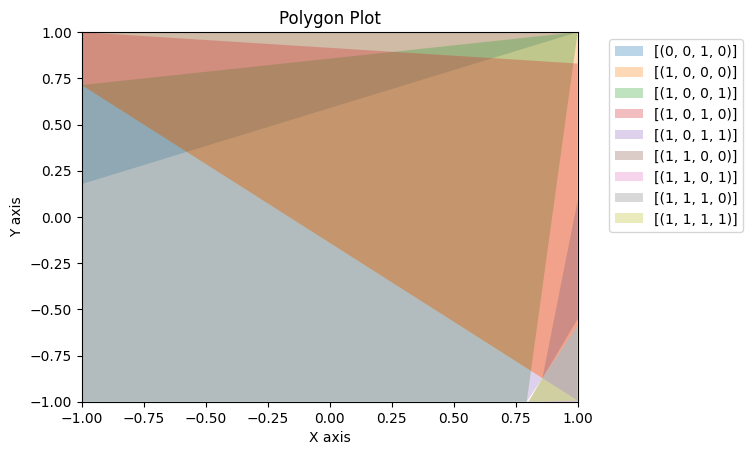

In [57]:
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt

for matrix, label in matricies:
    # compute the convex hull of the points
    hull = ConvexHull(matrix)

    # extract the x and y coordinates of the convex hull
    x = matrix[hull.vertices, 0]
    y = matrix[hull.vertices, 1]

    # plot and fill the polygon
    plt.fill(x, y, alpha=0.3, label=label)

# set the axis labels and title
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Polygon Plot')

# show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [58]:
import plotly.graph_objects as go
from scipy.spatial import ConvexHull
import numpy as np

# Placeholder list for storing traces
traces = []

for matrix, label in matricies:
    # compute the convex hull of the points
    hull = ConvexHull(matrix)

    # extract the x, y, and z coordinates of the convex hull
    x = matrix[hull.vertices, 0]
    y = matrix[hull.vertices, 1]
    z = matrix[hull.vertices, 2]

    # create a scatter trace for each matrix
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        name=label
    )
    traces.append(trace)

# create the layout
layout = go.Layout(
    title='3D Scatter plot',
    scene=dict(
        xaxis=dict(title='X axis'),
        yaxis=dict(title='Y axis'),
        zaxis=dict(title='Z axis')
    )
)

# create the figure and add the traces
fig = go.Figure(data=traces, layout=layout)

# show the plot
fig.show()

In [72]:
matricies[0]

(matrix([[ 1.        ,  1.        , -0.71998543],
         [ 1.        ,  0.82999248, -1.        ],
         [ 1.        ,  1.        , -1.        ],
         [-1.        ,  1.        ,  0.3508269 ],
         [-1.        ,  1.        , -1.        ],
         [-1.        ,  0.17986149, -1.        ]]),
 '[(0, 0, 1, 0)]')

In [80]:
matrix, label = matricies[0]
hull = ConvexHull(matrix)
for s in hull.simplices:
    print(
        np.hstack((
        matrix[s, 0],
        matrix[s, 1],
        matrix[s, 2]
        ))
    )

[[-1.          1.         -1.        ]
 [-1.          0.17986149 -1.        ]
 [-1.          1.          0.3508269 ]]
[[ 1.          1.         -0.71998543]
 [ 1.          1.         -1.        ]
 [ 1.          0.82999248 -1.        ]]
[[-1.          1.         -1.        ]
 [ 1.          1.         -1.        ]
 [ 1.          0.82999248 -1.        ]]
[[-1.          1.         -1.        ]
 [-1.          0.17986149 -1.        ]
 [ 1.          0.82999248 -1.        ]]
[[ 1.          1.         -0.71998543]
 [-1.          0.17986149 -1.        ]
 [ 1.          0.82999248 -1.        ]]
[[ 1.          1.         -0.71998543]
 [-1.          0.17986149 -1.        ]
 [-1.          1.          0.3508269 ]]
[[ 1.          1.         -0.71998543]
 [-1.          1.         -1.        ]
 [ 1.          1.         -1.        ]]
[[ 1.          1.         -0.71998543]
 [-1.          1.         -1.        ]
 [-1.          1.          0.3508269 ]]


In [74]:
hull

In [86]:
matrix

matrix([[ 0.85802315, -0.87258149, -0.18393384],
        [ 1.        , -0.99378624, -0.22424664],
        [ 0.79454357, -1.        , -0.18128233],
        [ 1.        , -1.        , -0.22477261],
        [ 1.        , -1.        , -0.22561468],
        [ 0.80161001, -1.        , -0.2065718 ]])

In [87]:
s

array([3, 5, 2], dtype=int32)

In [90]:
matrix[s, 2]

matrix([[-0.22477261],
        [-0.2065718 ],
        [-0.18128233]])

In [92]:
matrix[s, 2][2,0]

-0.18128233311301648

[(0, 0, 1, 0)]
plotting [4 5 3]
plotting [0 2 1]
plotting [4 2 1]
plotting [4 5 1]
plotting [0 5 1]
plotting [0 5 3]
plotting [0 4 2]
plotting [0 4 3]


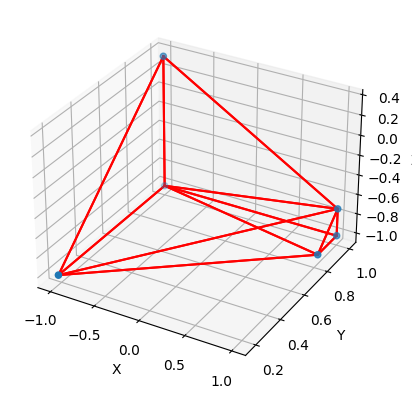

[(1, 0, 0, 0)]
plotting [7 6 5]
plotting [2 3 4]
plotting [7 4 5]
plotting [7 3 0]
plotting [7 3 4]
plotting [7 6 1]
plotting [7 1 0]
plotting [2 6 5]
plotting [2 4 5]
plotting [2 6 1]
plotting [2 3 0]
plotting [2 1 0]


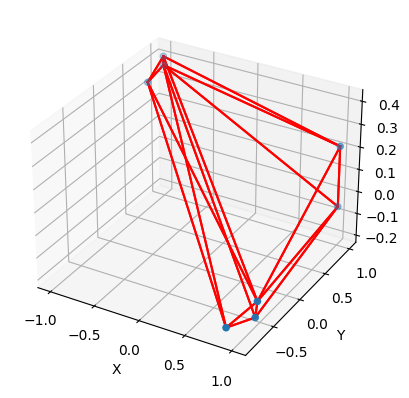

[(1, 0, 0, 1)]
plotting [ 1 11 10]
plotting [ 1 11  0]
plotting [1 4 7]
plotting [ 1 10  7]
plotting [ 9 11  0]
plotting [9 5 0]
plotting [9 5 6]
plotting [3 1 0]
plotting [3 1 4]
plotting [3 5 0]
plotting [3 5 6]
plotting [3 6 2]
plotting [ 8 11 10]
plotting [ 8 10  7]
plotting [ 8  9 11]
plotting [8 4 7]
plotting [8 3 4]
plotting [8 3 2]
plotting [8 9 6]
plotting [8 6 2]


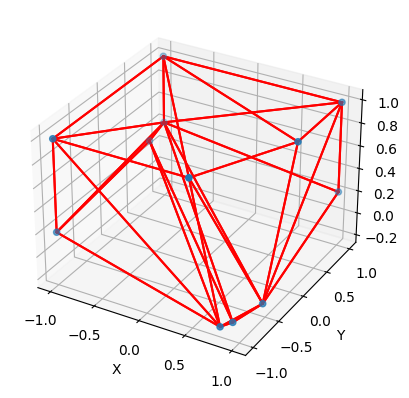

[(1, 0, 1, 0)]
plotting [ 9 13  0]
plotting [ 9 13 11]
plotting [12 10  6]
plotting [12  6  2]
plotting [12 10 11]
plotting [12 13 11]
plotting [8 1 0]
plotting [8 9 0]
plotting [8 9 7]
plotting [ 5  9 11]
plotting [ 5 10 11]
plotting [ 5 10  6]
plotting [5 9 7]
plotting [4 8 7]
plotting [4 5 7]
plotting [ 3 13  0]
plotting [3 1 0]
plotting [ 3 12  2]
plotting [ 3 12 13]
plotting [3 6 2]
plotting [3 5 6]
plotting [3 4 5]
plotting [3 8 1]
plotting [3 4 8]


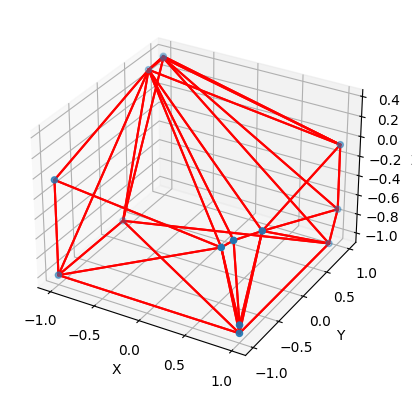

[(1, 0, 1, 1)]
plotting [1 0 2]
plotting [4 5 3]
plotting [5 0 2]
plotting [5 2 3]
plotting [4 2 3]
plotting [4 1 2]
plotting [4 5 0]
plotting [4 1 0]


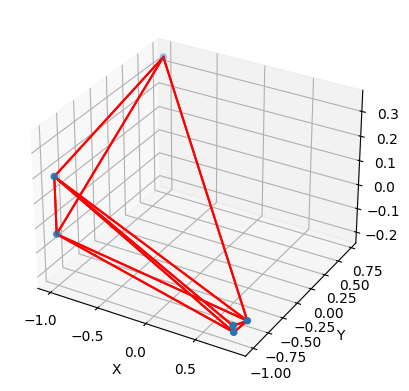

[(1, 1, 0, 0)]
plotting [3 2 0]
plotting [1 2 0]
plotting [1 3 0]
plotting [1 3 2]


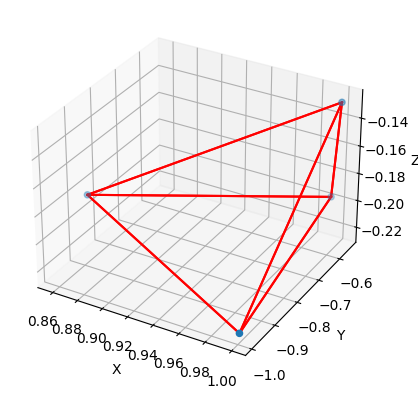

[(1, 1, 0, 1)]
plotting [6 0 5]
plotting [3 2 1]
plotting [4 6 7]
plotting [4 6 5]
plotting [2 4 5]
plotting [2 0 5]
plotting [2 4 1]
plotting [3 6 7]
plotting [3 2 0]
plotting [3 6 0]
plotting [3 4 7]
plotting [3 4 1]


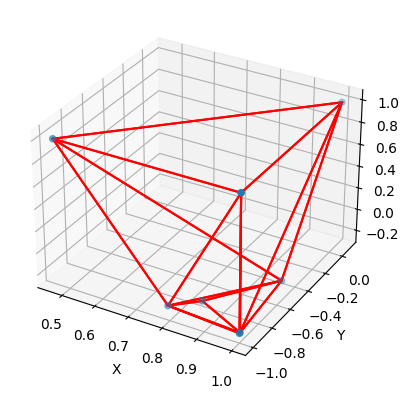

[(1, 1, 1, 0)]
plotting [0 1 2]
plotting [4 3 5]
plotting [0 3 1]
plotting [0 3 5]
plotting [4 0 5]
plotting [4 0 2]
plotting [4 3 1]
plotting [4 1 2]


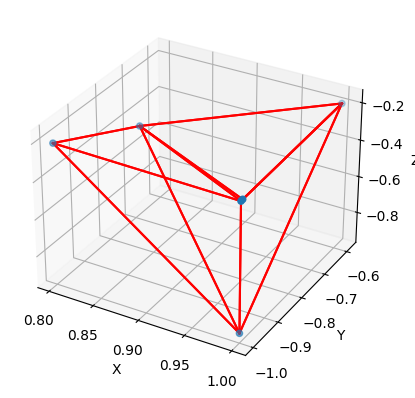

[(1, 1, 1, 1)]
plotting [5 0 2]
plotting [3 4 1]
plotting [5 4 1]
plotting [5 0 1]
plotting [3 0 1]
plotting [3 0 2]
plotting [3 5 4]
plotting [3 5 2]


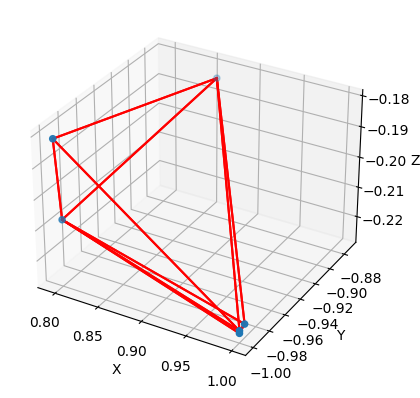

In [93]:
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming matrices is a list of [matrix, label] items
for matrix, label in matricies:
    # Compute the convex hull of the points
    hull = ConvexHull(matrix)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    print(f"{label}")
    # Plot vertices
    ax.scatter(matrix[:,0], matrix[:,1], matrix[:,2], 'ko')

    # Plot ridges
    for s in hull.simplices:
        #s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        #ax.plot(matrix[s, 0], matrix[s, 1], matrix[s, 2], "r-")
        print(f"plotting {s}")
        #ax.plot(hull[s][:0], hull[s][:1], hull[s][:2], "r-")
        #ax.plot (matrix[s, 0], matrix[s, 1], matrix[s, 2], "r-")
        x, y, z = (matrix[s, 0], matrix[s, 1], matrix[s, 2])
        a = x[0,0], y[0,0], z[0,0]
        b = x[1,0], y[1,0], z[1,0]
        c = x[2,0], y[2,0], z[2,0]
        
        #import pdb; pdb.set_trace()
        ax.plot ([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], "r-")
        ax.plot ([b[0], c[0]], [b[1], c[1]], [b[2], c[2]], "r-")
        ax.plot ([a[0], c[0]], [a[1], c[1]], [a[2], c[2]], "r-")        
        
    #ax.plot(hull[hull.simplices][:0], hull[hull.simplices][:1], hull[hull.simplices][:2], "r-")

        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [125]:
import plotly.graph_objects as go
from scipy.spatial import ConvexHull
import numpy as np

# Assuming matrices is a list of [matrix, label] items
for matrix, label in matricies:
    # Compute the convex hull of the points
    hull = ConvexHull(matrix)

    # Create the traces for the scatter plot
    scatter_trace = go.Scatter3d(
        x=matrix[:,0], 
        y=matrix[:,1], 
        z=matrix[:,2], 
        mode='markers',
        marker=dict(size=3, color='black'),
        name=f'{label} Vertices'
    )

    # Create the traces for the hull edges
    edge_traces = []
    for s in hull.simplices:
        x, y, z = (matrix[s, 0], matrix[s, 1], matrix[s, 2])
#         a = x[0], y[0], z[0]
#         b = x[1], y[1], z[1]
#         c = x[2], y[2], z[2]
        a = x[0,0], y[0,0], z[0,0]
        b = x[1,0], y[1,0], z[1,0]
        c = x[2,0], y[2,0], z[2,0]

        edge_trace_ab = go.Scatter3d(
            x=[a[0], b[0]], 
            y=[a[1], b[1]], 
            z=[a[2], b[2]], 
            mode='lines',
            line=dict(color='red'),
            name=f'{label} Edge'
        )

        edge_trace_bc = go.Scatter3d(
            x=[b[0], c[0]], 
            y=[b[1], c[1]], 
            z=[b[2], c[2]], 
            mode='lines',
            line=dict(color='red'),
            name=f'{label} Edge'
        )

        edge_trace_ac = go.Scatter3d(
            x=[a[0], c[0]], 
            y=[a[1], c[1]], 
            z=[a[2], c[2]], 
            mode='lines',
            line=dict(color='red'),
            name=f'{label} Edge'
        )

        edge_traces.extend([edge_trace_ab, edge_trace_bc, edge_trace_ac])

    # Create the layout
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        )
    )

    # Create the figure
    fig = go.Figure(data=[scatter_trace, *edge_traces], layout=layout)

    # Show the plot
    fig.show()


In [124]:
import plotly.graph_objects as go
from scipy.spatial import ConvexHull
import numpy as np

# Assuming matrices is a list of [matrix, label] items
for matrix, label in matricies:
    # Compute the convex hull of the points
    hull = ConvexHull(matrix)

    # Create the traces for the scatter plot
    scatter_trace = go.Scatter3d(
        x=matrix[:,0], 
        y=matrix[:,1], 
        z=matrix[:,2], 
        mode='markers',
        marker=dict(size=3, color='black'),
        name=f'{label} Vertices'
    )

    # Create the traces for the hull edges and surface
    points = hull.points
    x = points[:,0]
    y = points[:,1]
    z = points[:,2]

    i = []
    j = []
    k = []

    # According to plotly 3d-mesh docs: 'i, j, and k give the verticies of the triangles'
    for s in hull.simplices:
        i.append(s[0])
        j.append(s[1])
        k.append(s[2])
    
    mesh_trace = go.Mesh3d(
        x=x, 
        y=y, 
        z=z,
        i=i,
        j=j,
        k=k,
        color='red',
        opacity=0.50,
        name=f'{label} Hull'
    )

    # Create the layout
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        )
    )

    # Create the figure
    fig = go.Figure(data=[scatter_trace, mesh_trace], layout=layout)

    # Show the plot
    fig.show()